In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import functions

from IPython.display import display, Math, Latex


In [2]:
data_train, data_valid = functions.load_data()

X_train,y_train = functions.extract_X_y(data_train)
X_valid, y_valid = functions.extract_X_y(data_valid)

#standardize
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_valid = (X_valid - np.mean(X_valid, axis=0)) / np.std(X_valid, axis=0)

1. Logistic Regression

In [3]:

display(Latex(r'''
Logistic Regression classifies data based on the probabilistic model:
\begin{align*}
            p(y^{(i)} = 1 \mid x^{(i)}; \theta) &= \dfrac{1}{1 + e^{-\theta^Tx^{(i)}}}\\
                                                &= h_{\theta}(x^{(i)})
\end{align*}
The parameter theta is chosen by maximizing the log-likelihood (= negative Loss Function):
\begin{align*}
            \ln\mathcal{L}(\theta) = \sum_{i=1}^m y^{(i)}\ln h_{\theta}(x^{(i)}) + (1-y^{(i)})\ln(1-h_{\theta}(x^{(i)})) 
\end{align*}

Let $J(\theta) = -\ln \mathcal{L}(\theta)$ be our loss function. It can be checked that $J$ is convex,
so we can use gradient descent to minimize it:
\begin{align*}
    \theta &:= \theta - \alpha \nabla_{\theta}J \\
    \Longleftrightarrow \theta &:= \theta - \alpha\sum_{i=1}^m \big( h_{\theta}(x^{(i)}) - y^{(i)} \big)x^{(i)}\\
\end{align*}            
In practise, people add a $\frac{1}{m}$ in front of the gradient, so our update rule when implemented should be (
              we split $\theta$ to $w,b$):
\begin{align*}
            w &:= w - \alpha \cdot \dfrac{1}{m} X^T \cdot (X_{pred} - y)  \\
            b &:= b - \alpha \cdot \dfrac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) 
\end{align*}
For the $L_2$ regularization case (Ridge), we add $\dfrac{\lambda}{2m} \| \theta \|^2 $ to the loss function, so
our update rule becomes:
\begin{align*}
            w &:= w - \alpha \cdot \bigg( \dfrac{1}{m} X^T \cdot (X_{pred} - y) + \dfrac{\lambda}{m}w \bigg) \\
            b &:= b - \alpha \cdot \dfrac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})
\end{align*}              
'''))


<IPython.core.display.Latex object>

In [4]:
class LogisticRegression():
    def __init__(self, alpha = 0.1, l = 0):
        #hyperparameters

        self.alpha = alpha #learning rate
        self.l = l #lambda regularization

        #parameter

        self.w = None
        self.b = 0
    
    def h_theta(self, X): #note: this works for X = (m x n) or X = (1, n)
        #print("X, w:", X.shape, self.w.shape)
        e = np.exp(X @ self.w + self.b)
        #print(e / (1 + e))
        return e / (1 + e)

    def fit(self, X, y, iterations = 100): #no intercept needed (we handle implicitly with b)
        m,n = X.shape

        self.w = np.zeros((n, 1))
        for i in range (0, iterations):
            #if(i % 100 == 0): print("iter: ", i)
            self.w = self.w - self.alpha * (1/m) * (X.T @ (self.h_theta(X) - y) + self.l * self.w)
            self.b = self.b - self.alpha * (1/m) * np.sum(self.h_theta(X) - y)
            
            #print("b = ", self.b)

    def predict(self, x):
        y = x
        m,n = x.shape
        if(m != 1): y = x.reshape(1, -1)

        return (1 if self.h_theta(y) >= 0.5 else 0)

        

[[-0.01423889]
 [ 1.19494702]
 [-1.00482334]]
training acc:  0.86625
valid acc:  0.81


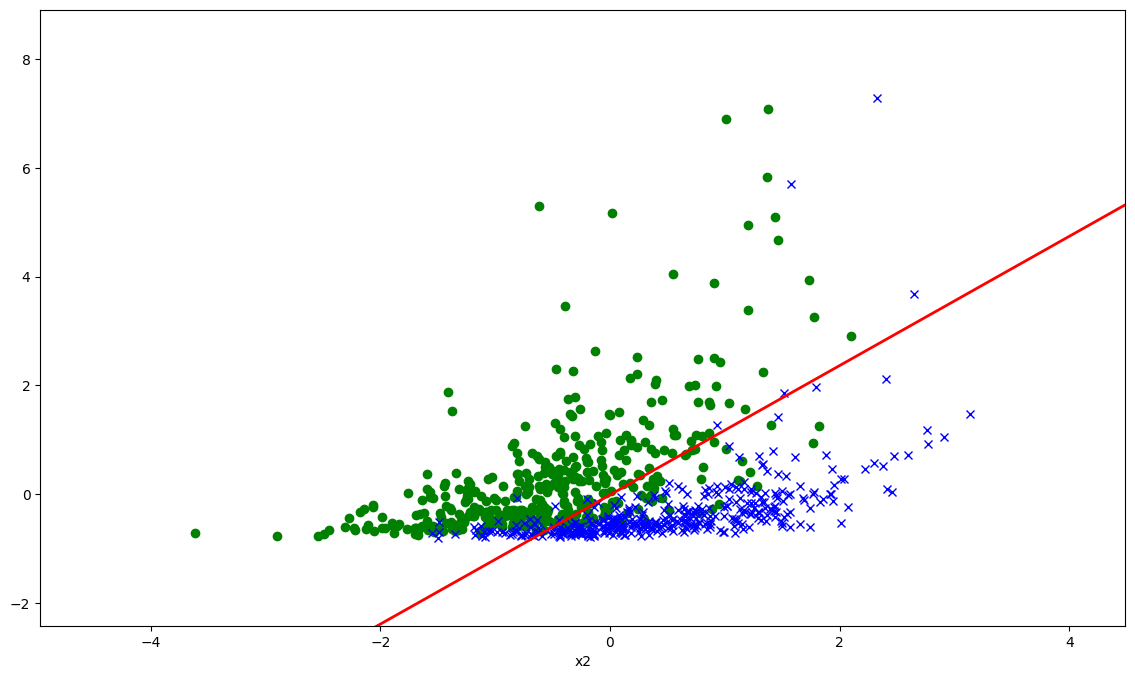

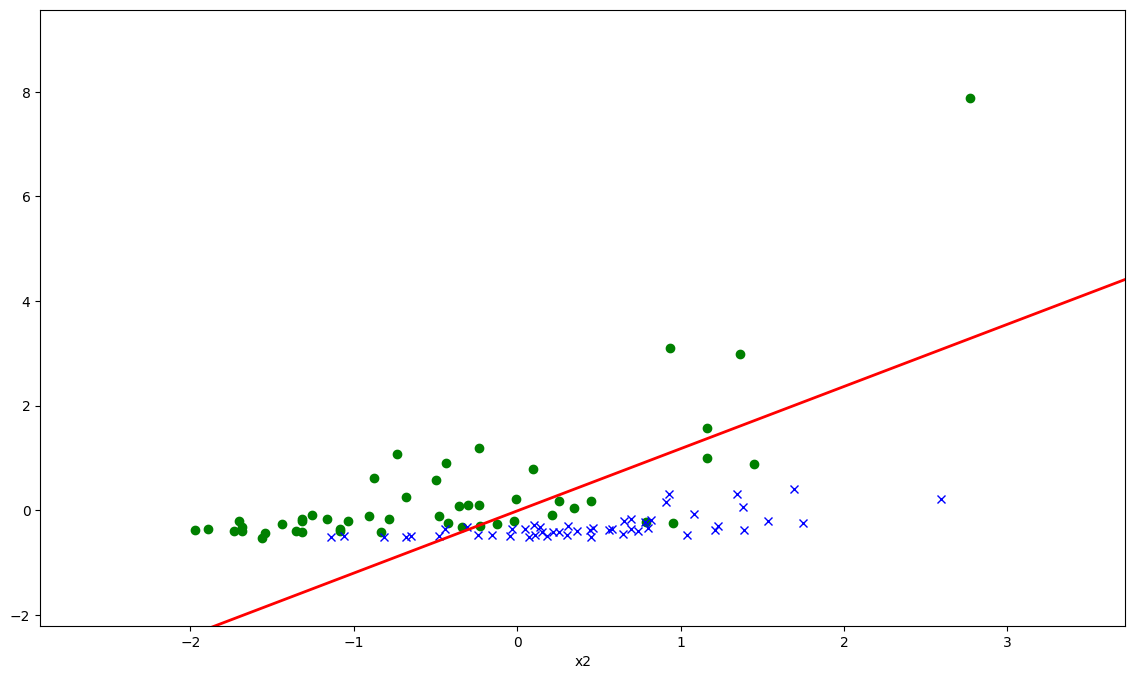

In [5]:
model = LogisticRegression(alpha=0.1, l = 0)
model.fit(X_train, y_train.reshape(-1, 1), iterations=100)

theta = np.vstack((np.array([[model.b]]), model.w))
print(theta)

print("training acc: ", functions.accuracy_score(model.h_theta(X_train), y_train.reshape(-1,1)))
print("valid acc: ", functions.accuracy_score(model.h_theta(X_valid), y_valid.reshape(-1,1)))

functions.plot_2D_data(X_train, y_train, theta)
functions.plot_2D_data(X_valid, y_valid, theta)